# Analítica de datos
# Examen parcial 1
# 2018-02
# <font color='red'> NOMBRE APELLIDO, código </font>

El dataset que deben analizar contiene los registros del histórico de las personas a las que se les ha otorgado un crédito financiero, indicando quienes pudieron pagarlo sin problemas y quienes no.

La idea es poder predecir, utilizando un modelo de aprendizaje supervisado (KNN) y las variables independientes disponibles qué aspirantes a un crédito tienen mas o menos riesgo de pagar.

Las variables de la hoja de datos son las siguientes:
- ID: El ID del cliente en el banco. Numérico, debe ser positivo y único.
- PudoPagar: Indica si el cliente ha podido pagar el crédito sin problemas (1) o no (0). Variable categórica binaria.
- Estudiante: Indica si el cliente es estudiante (Si) o no lo es (No). Variable categórica binaria.
- Deuda: Indica la cantidad del crédito que aún adeuda el cliente. Deben ser valores numéricos positivos o nulos.
- Cuenta: Indica el dinero que tiene en la cuenta del banco. Deben ser valores numéricos.

## Entendimiento de los datos, limpieza

El archivo "creditos_examen.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

#### Puntos a desarrollar

- <font color='red'>Carguen el archivo en memoria y exploren los datos, tratando de identificar problemas e inconsistencias teniendo en cuenta el diccionario de datos y el contexto del problema. (0.7) </font>

- <font color='red'>Obtengan el modelo de referencia (Baseline) y calculen sus métricas de evaluación. (0.3)</font>

- <font color='red'>Limpien los datos arreglando los problemas, eliminando columnas, eliminando registros, o ignorándolos, justificando sus decisiones. 
Una vez resueltos los problemas encontrados, indique la siguiente información: ID del registro, Tipo de ProblemaResolución. (1.2)</font>

## Modelamiento con K-NN

#### Puntos a desarrollar:

- <font color='red'>Escogiendo un valor de los parámetros al azar, construyan un modelo K-NN inicial sobre los datos limpios y calcule las métricas de accuracy, error, kappa, precision, recall, especifidad, y F-measure. Analice la calidad del modelo interpretando las métricas (1.0).</font>

- <font color='red'>Teniendo en cuenta las métricas más adecuadas para el problema, y siguiendo un protocolo de evaluación adecuado, establezca el mejor valor de los parámetros del modelo. (1.5)</font>

- <font color='red'>¿El valor de los parámetros inicialmente escogido estaba en una situación de overfitting o de underfitting? Explique su respuesta. (0.5)</font>

# Desarrollo de los puntos

In [62]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import KFold, cross_val_score #protocolo de evaluación
from sklearn import neighbors, datasets, metrics
from sklearn import preprocessing 
import seaborn as sns

Cargamos los datos en memoria y visualizamos los datos iniciales y resumidos.

In [63]:
data = pd.read_csv('creditos_examen.csv', index_col=0, sep=";")
data.head()

,PudoPagar,Estudiante,Ingresos,Cuenta
ID,,,,
-1,0,No,3196574,358943
-1,0,No,4944040,3857756
1,0,No,4436163,3647632
2,0,Si,1210613,4085902
3,0,No,3176714,5367746


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, -1 to 10000
Data columns (total 4 columns):
PudoPagar     10000 non-null int64
Estudiante    9996 non-null object
Ingresos      10000 non-null int64
Cuenta        10000 non-null int64
dtypes: int64(3), object(1)
memory usage: 390.6+ KB


In [65]:
data.describe(include="all")

,PudoPagar,Estudiante,Ingresos,Cuenta
count,10000.000000,9996,1.000000e+04,1.000000e+04
unique,NaN,2,NaN,NaN
top,NaN,No,NaN,NaN
freq,NaN,7052,NaN,NaN
mean,0.033300,NaN,3.036625e+06,1.433952e+07
std,0.179428,NaN,7.028938e+07,1.016575e+09
min,0.000000,NaN,-4.288864e+09,-2.247063e+07
25%,0.000000,NaN,1.823537e+06,2.408656e+06
50%,0.000000,NaN,3.209805e+06,4.118185e+06
75%,0.000000,NaN,4.281578e+06,5.831542e+06


Podemos identificar varios problemas que podemos tratar inmediatamente

In [66]:
data.dtypes

PudoPagar      int64
Estudiante    object
Ingresos       int64
Cuenta         int64
dtype: object

### Limpieza: IDs negativos
Así estos IDs no sean validos, la columna IDs no debe tenerse en cuenta, no se va a considerar como una variable independiente y no tendrá incidencia en la predicción

### Limpieza: tipo de columna dependiente
Nos damos cuenta que la variable dependiente "PudoPagar" tiene tipo entero. Hay que cambiarla a caracter, para que sea categórica, ya que se trata de un problema de clasificación.

In [67]:
data.PudoPagar = data.PudoPagar.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, -1 to 10000
Data columns (total 4 columns):
PudoPagar     10000 non-null object
Estudiante    9996 non-null object
Ingresos      10000 non-null int64
Cuenta        10000 non-null int64
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


### Baseline

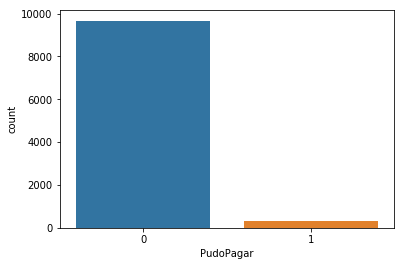

In [68]:
ax = sns.countplot(x="PudoPagar", data=data)

In [69]:
data.PudoPagar[data.PudoPagar=="0"].aggregate('count')

9667

In [70]:
data[data.PudoPagar=="0"].aggregate('mean')

PudoPagar    0.000000e+00
Ingresos     3.054568e+06
Cuenta       4.017162e+06
dtype: float64

In [71]:
data.shape[0]

10000

In [72]:
data.PudoPagar[data.PudoPagar=="0"].aggregate('count') / data.shape[0] * 100

96.67

Tenemos que el baseline es un modelo que clasifica a todos los registros en "No pudo pagar", con una exactitud de 98.67%

### Limpieza: Estudiante tiene valores faltantes

También encontramos que Estudiante tiene 4 registros faltantes. Cómo se trata de solo 4 registros de 10000, los podemos eliminar sin que esto tenga mayor incidencia en el modelado final. 

In [74]:
data[data.Estudiante.isna()]
data.dropna()
data[data.Estudiante.isna()]

,PudoPagar,Estudiante,Ingresos,Cuenta
ID,,,,
760,0,NaN,2538070,1924989
780,0,NaN,4119537,5096245
800,0,NaN,3377683,50944
820,0,NaN,2721295,474662


In [12]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, -1 to 10000
Data columns (total 4 columns):
PudoPagar     9996 non-null object
Estudiante    9996 non-null object
Ingresos      9996 non-null int64
Cuenta        9996 non-null int64
dtypes: int64(2), object(2)
memory usage: 390.5+ KB


### Limpieza: Valores negativos en Deuda

In [13]:
print(data[data.Ingresos <0].shape)
data[data.Ingresos <0] 

(999, 4)


,PudoPagar,Estudiante,Ingresos,Cuenta
ID,,,,
1501,0,No,-6954195,632793
1502,0,No,-2424394,1936181
1503,1,Si,-1177023,11664391
1504,0,No,-2441113,6797192
1505,0,No,-5836039,2346659
1506,0,No,-4008669,556475
1507,0,No,-5435573,7219376
1508,0,No,-5156003,1984102
1509,0,Si,-1516049,730756


Hay 999 registros con ingresos negativos, lo cual no tiene sentido según la definición del diccionario de datos.

Al analizarlos un poco más en detalle, encontramos que corresponden a los registros empezando en 1501 y finalizando en 2499, lo cual no parece una casualidad. Parece que hubo un problema en el sistema y se han grabado valores negativos sistemáticamente en esos índices.

Cómo el número de registros es importante (mas del 10% de los datos), y considerando lo anterior, se puede estimar que esos valores que ahí se encuentran son los correctos, con el signo al revés. Es por esto que arreglamos los registros también de manera sistemática. 

In [14]:
data.Ingresos[data.Ingresos <0].head()

ID
1501   -6954195
1502   -2424394
1503   -1177023
1504   -2441113
1505   -5836039
Name: Ingresos, dtype: int64

In [15]:
data.Ingresos = data.Ingresos.abs()

In [16]:
data.describe(include="all")

,PudoPagar,Estudiante,Ingresos,Cuenta
count,9996,9996,9.996000e+03,9.996000e+03
unique,2,2,NaN,NaN
top,0,No,NaN,NaN
freq,9663,7052,NaN,NaN
mean,NaN,NaN,4.563190e+06,1.434450e+07
std,NaN,NaN,7.022087e+07,1.016778e+09
min,NaN,NaN,7.719700e+04,-2.247063e+07
25%,NaN,NaN,2.133550e+06,2.409284e+06
50%,NaN,NaN,3.455722e+06,4.118502e+06
75%,NaN,NaN,4.381843e+06,5.833031e+06


D:\Installs\Anaconda3\envs\tf\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


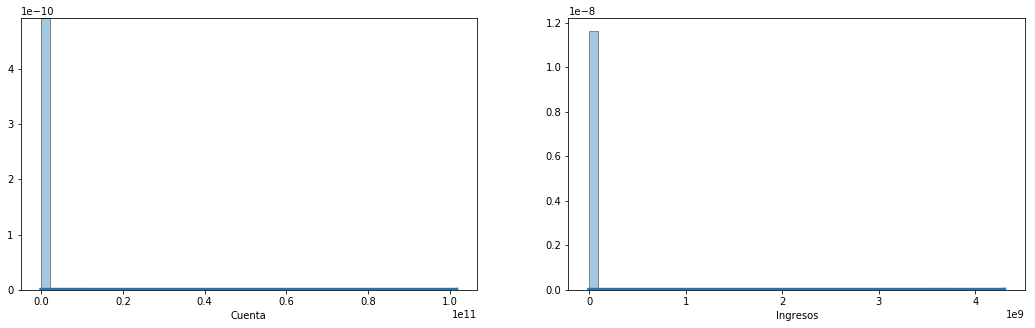

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.distplot(data.Cuenta, hist=True, kde=True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.subplot(1,2,2)
sns.distplot(data.Ingresos, hist=True, kde=True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


D:\Installs\Anaconda3\envs\tf\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Installs\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Installs\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Installs\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


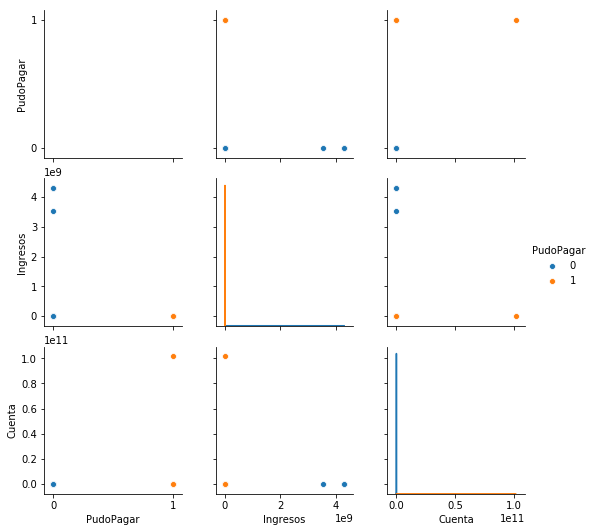

<Figure size 1296x1296 with 0 Axes>

In [18]:
sns.pairplot(data=data, hue="PudoPagar")
plt.figure(figsize=(18,18))
plt.tight_layout()

Vemos que las variables Cuenta e Ingresos tienen una distribución donde la mayoría de los datos están muy cerca entre ellos, y existen valores positivos muy por encima del resto que pueden considerarse excepciones.

Vamos a identificarlos, eliminarlos y volver a intentar una visualización.

In [19]:
data.Ingresos.describe()

count    9.996000e+03
mean     4.563190e+06
std      7.022087e+07
min      7.719700e+04
25%      2.133550e+06
50%      3.455722e+06
75%      4.381843e+06
max      4.299358e+09
Name: Ingresos, dtype: float64

In [20]:
data[data.Ingresos>1e+08]

,PudoPagar,Estudiante,Ingresos,Cuenta
ID,,,,
2400,0,No,4288864105,7669586
2500,0,No,4299357653,7981139
2599,0,No,3533318222,2532130


In [21]:
data = data[data.Ingresos<1e+07]

In [22]:
data.Cuenta.describe()

count    9.993000e+03
mean     1.434699e+07
std      1.016931e+09
min     -2.247063e+07
25%      2.409205e+06
50%      4.118321e+06
75%      5.831066e+06
max      1.016613e+11
Name: Cuenta, dtype: float64

In [23]:
data[data.Cuenta>1e+07]

,PudoPagar,Estudiante,Ingresos,Cuenta
ID,,,,
174,1,Si,1427149,11028998
310,0,Si,1833674,10113373
735,0,Si,2713654,10023638
934,0,No,3474776,10565095
1000,1,No,4499829,101661341341
1099,1,No,5150887,10120525
1137,1,No,5150429,12495084
1161,1,Si,1494752,12513425
1256,1,Si,2383646,10616846


In [24]:
data = data[data.Cuenta<1e+08]

In [25]:
data.Cuenta.describe()

count    9.992000e+03
mean     4.174152e+06
std      2.432012e+06
min     -2.247063e+07
25%      2.409126e+06
50%      4.118185e+06
75%      5.830642e+06
max      1.327161e+07
Name: Cuenta, dtype: float64

Vemos también que Cuenta tiene valores muy negativos, vamos a identificarlos

In [26]:
data[data.Cuenta<0]

,PudoPagar,Estudiante,Ingresos,Cuenta
ID,,,,
1500,0,No,5289225,-22470634


Lo eliminamos al ser solo un registro.

In [27]:
data = data[data.Cuenta>=0]

D:\Installs\Anaconda3\envs\tf\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Installs\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Installs\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Installs\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


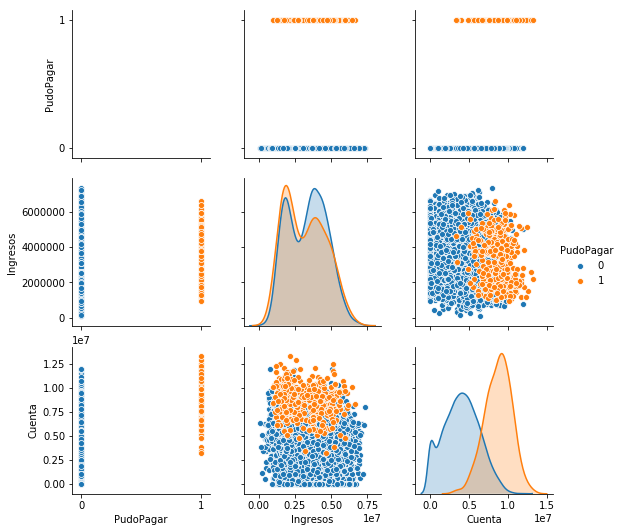

<Figure size 1296x1296 with 0 Axes>

In [28]:
sns.pairplot(data, hue="PudoPagar")
plt.figure(figsize=(18,18))
plt.tight_layout()

Vemos que para valores bajos de cuenta tenemos es más probable que los clientes no paguen. Cuenta es una variable bastante discriminante.

Vemos también que los que tienen salarios altos, contra intuitivamente son mas propensos a no pagar. 

## Modelamiento con K-NN

Al utilizar un modelo de K-NN, solo se pueden considerar las variables numéricas, por lo que no vamos a considerar la variable Estudiante como variables independiente.

Además de hacer un solo modelo para todos los clientes independientemete de si son o no estudiantes, otra manera de tener en cuenta esta información es creando dos modelos, uno para los estudiantes y otro para los que no lo son.

Vamos a construir estos modelos, para lo que vamos a preparar los datasets correspondientes.

In [29]:
X = data.loc[:,['Cuenta', 'Ingresos']]
print(X.shape)
X.head()

(9991, 2)


,Cuenta,Ingresos
ID,,
-1,358943,3196574
-1,3857756,4944040
1,3647632,4436163
2,4085902,1210613
3,5367746,3176714


In [30]:
y = data.loc[:,['PudoPagar']]
print(y.shape)
y.head()

(9991, 1)


,PudoPagar
ID,
-1,0
-1,0
1,0
2,0
3,0


## Holdout, un sólo modelo

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

Vamos a normalizar las dos variables numéricas para que tengan la misma importancia en el modelo de KNN, dado que este se basa en la distancia las diferencias de escalas son importantes.

In [32]:
# Crear un normalizador Min-Max
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [33]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [34]:
acc_train_vec=[]
acc_test_vec=[]
kappa_train_vec=[]
kappa_test_vec=[]
k_vec= np.arange(1,201,2)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_train_scaled)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    y_pred = knn.predict(X_test_scaled)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))


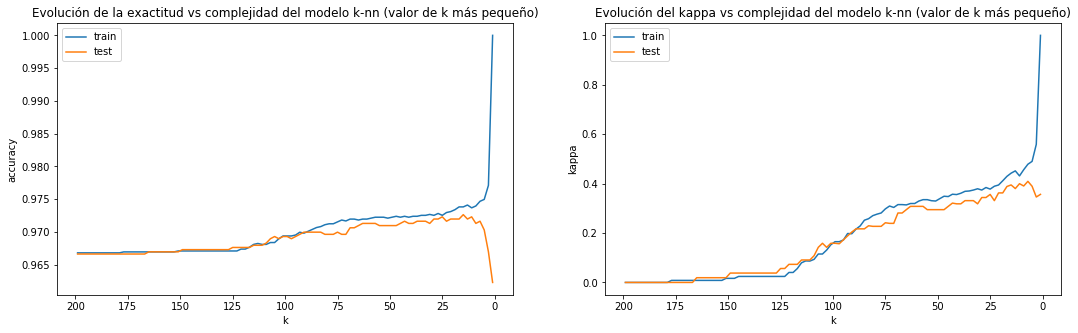

In [35]:
fig = plt.figure(figsize=(18,5))

fig.add_subplot(1, 2, 1)
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de la exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

fig.add_subplot(1, 2, 2)
ax = plt.gca() # get current axis
plt.plot(k_vec, kappa_train_vec)
plt.plot(k_vec, kappa_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('kappa')
plt.title('Evolución del kappa vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])


In [36]:
k_optimo = k_vec[np.argmax(acc_test_vec)]
acc_optima= max(acc_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de exactitud" %(k_optimo, 100*acc_optima))

k_optimo = k_vec[np.argmax(kappa_test_vec)]
kappa_optima= max(kappa_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de kappa" %(k_optimo, 100*kappa_optima))

El óptimo se obtiene con K=15, que produce un 97.26% de exactitud
El óptimo se obtiene con K=7, que produce un 40.92% de kappa


In [37]:
knn = neighbors.KNeighborsClassifier(n_neighbors=k_optimo)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))

In [38]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, "0", average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, "0", average='macro'))

Exactitud:  0.9716477651767845
Kappa    :  0.409166577789319
Precisión     :  0.9766180955608268
Recall        :  0.9944789510006902


## K-Fold Cross-Validation

No necesitamos dividir los datos, pues internamente el protocolo se encargará de hacerlo K veces.

In [39]:
# Crear un normalizador Min-Max
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_scaled = min_max_scaler.fit_transform(X)

acc_mean_vec=[]
k_vec= np.arange(1,101,2)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    acc_vec_fold = cross_val_score(knn, X_scaled, np.squeeze(y), cv=10, scoring='accuracy')
    acc_mean_vec.append(acc_vec_fold.mean())
    

#print(acc_mean_vec)
#print(k_vec)

Text(0.5,1,'Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')

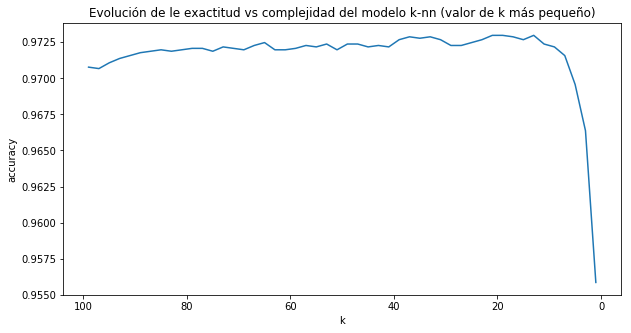

In [40]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_mean_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')

In [41]:
k_optimo = k_vec[np.argmax(acc_mean_vec)]
acc_optima= max(acc_mean_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de exactitud" %(k_optimo, 100*acc_optima))

El óptimo se obtiene con K=13, que produce un 97.30% de exactitud


# Holdout, dos modelos

Hacemos un modelo para los estudiantes y otro para los no estudiantes, partimos entonces los datos en dos datasets independientes.

In [41]:
dataNoEstudiante = data[data.Estudiante=="No"]
dataSiEstudiante = data[data.Estudiante=="Si"]
print("tenemos %d no estudiantes y %d estudiantes" % (dataNoEstudiante.shape[0], dataSiEstudiante.shape[0]))

tenemos 7047 no estudiantes y 2944 estudiantes


## Modelo para los no estudiantes

In [43]:
X = dataNoEstudiante.loc[:,['Cuenta', 'Ingresos']]
y = dataNoEstudiante.loc[:,['PudoPagar']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

Vamos a normalizar las dos variables numéricas para que tengan la misma importancia en el modelo de KNN, dado que este se basa en la distancia las diferencias de escalas son importantes.

In [45]:
# Crear un normalizador Min-Max
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [46]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [47]:
acc_train_vec=[]
acc_test_vec=[]
kappa_train_vec=[]
kappa_test_vec=[]
k_vec= np.arange(1,201,2)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_train_scaled)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    y_pred = knn.predict(X_test_scaled)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))


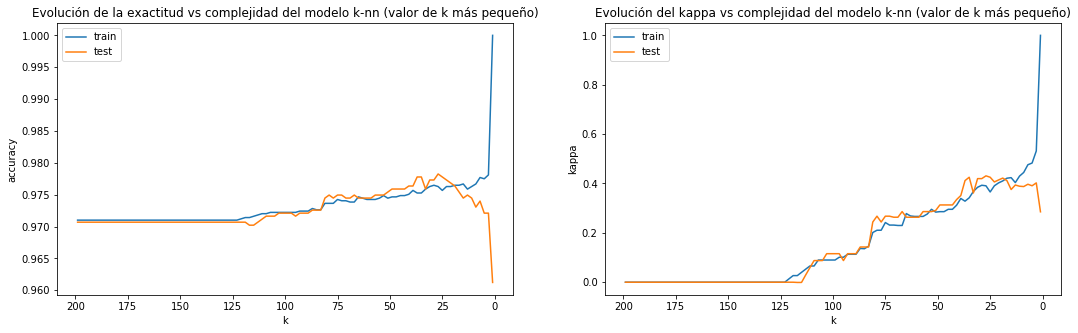

In [48]:
fig = plt.figure(figsize=(18,5))

fig.add_subplot(1, 2, 1)
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de la exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

fig.add_subplot(1, 2, 2)
ax = plt.gca() # get current axis
plt.plot(k_vec, kappa_train_vec)
plt.plot(k_vec, kappa_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('kappa')
plt.title('Evolución del kappa vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])


In [49]:
k_optimo = k_vec[np.argmax(acc_test_vec)]
acc_optima= max(acc_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de exactitud" %(k_optimo, 100*acc_optima))

k_optimo = k_vec[np.argmax(kappa_test_vec)]
kappa_optima= max(kappa_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de kappa" %(k_optimo, 100*kappa_optima))

El óptimo se obtiene con K=27, que produce un 97.83% de exactitud
El óptimo se obtiene con K=27, que produce un 43.09% de kappa


In [50]:
knn = neighbors.KNeighborsClassifier(n_neighbors=k_optimo)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))

In [52]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, "0", average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, "0", average='macro'))

Exactitud:  0.9782505910165484
Kappa    :  0.4308862240421175
Precisión     :  0.9789976133651551
Recall        :  0.9990258158792011


## Modelo para los estudiantes

In [53]:
X = dataSiEstudiante.loc[:,['Cuenta', 'Ingresos']]
y = dataSiEstudiante.loc[:,['PudoPagar']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

Vamos a normalizar las dos variables numéricas para que tengan la misma importancia en el modelo de KNN, dado que este se basa en la distancia las diferencias de escalas son importantes.

In [55]:
# Crear un normalizador Min-Max
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [56]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [57]:
acc_train_vec=[]
acc_test_vec=[]
kappa_train_vec=[]
kappa_test_vec=[]
k_vec= np.arange(1,201,2)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_train_scaled)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    y_pred = knn.predict(X_test_scaled)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))


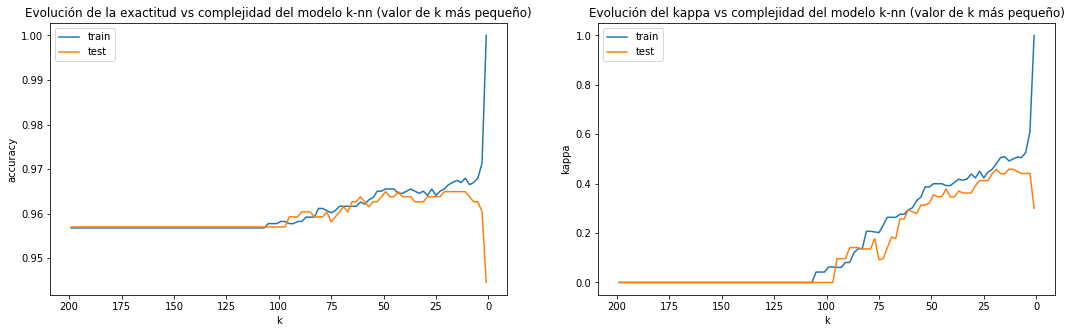

In [58]:
fig = plt.figure(figsize=(18,5))

fig.add_subplot(1, 2, 1)
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de la exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

fig.add_subplot(1, 2, 2)
ax = plt.gca() # get current axis
plt.plot(k_vec, kappa_train_vec)
plt.plot(k_vec, kappa_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('kappa')
plt.title('Evolución del kappa vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])


In [59]:
k_optimo = k_vec[np.argmax(acc_test_vec)]
acc_optima= max(acc_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de exactitud" %(k_optimo, 100*acc_optima))

k_optimo = k_vec[np.argmax(kappa_test_vec)]
kappa_optima= max(kappa_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de kappa" %(k_optimo, 100*kappa_optima))

El óptimo se obtiene con K=11, que produce un 96.49% de exactitud
El óptimo se obtiene con K=11, que produce un 45.80% de kappa


In [60]:
knn = neighbors.KNeighborsClassifier(n_neighbors=k_optimo)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))

In [61]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, "0", average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, "0", average='macro'))

Exactitud:  0.9649321266968326
Kappa    :  0.45799050632911387
Precisión     :  0.9721900347624566
Recall        :  0.991725768321513
